In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
a = 1
def ShowHist(df):
    global a
    plt.figure(figsize=(20,40))
    for i, col in enumerate(df.columns):
        plt.subplot(9, 3, i + 1)
        df[col].hist(edgecolor = "k", bins = 100, density = True)
        plt.title(col)
    #plt.savefig("hist" + str(a))
    a += 1
    plt.show()

In [3]:
#讀取資料|
df_train = pd.read_csv("./data/d-51-53/train_data.csv")
df_test = pd.read_csv("./data/d-51-53/test_features.csv")
df_train

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,356071.0,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [4]:
df_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


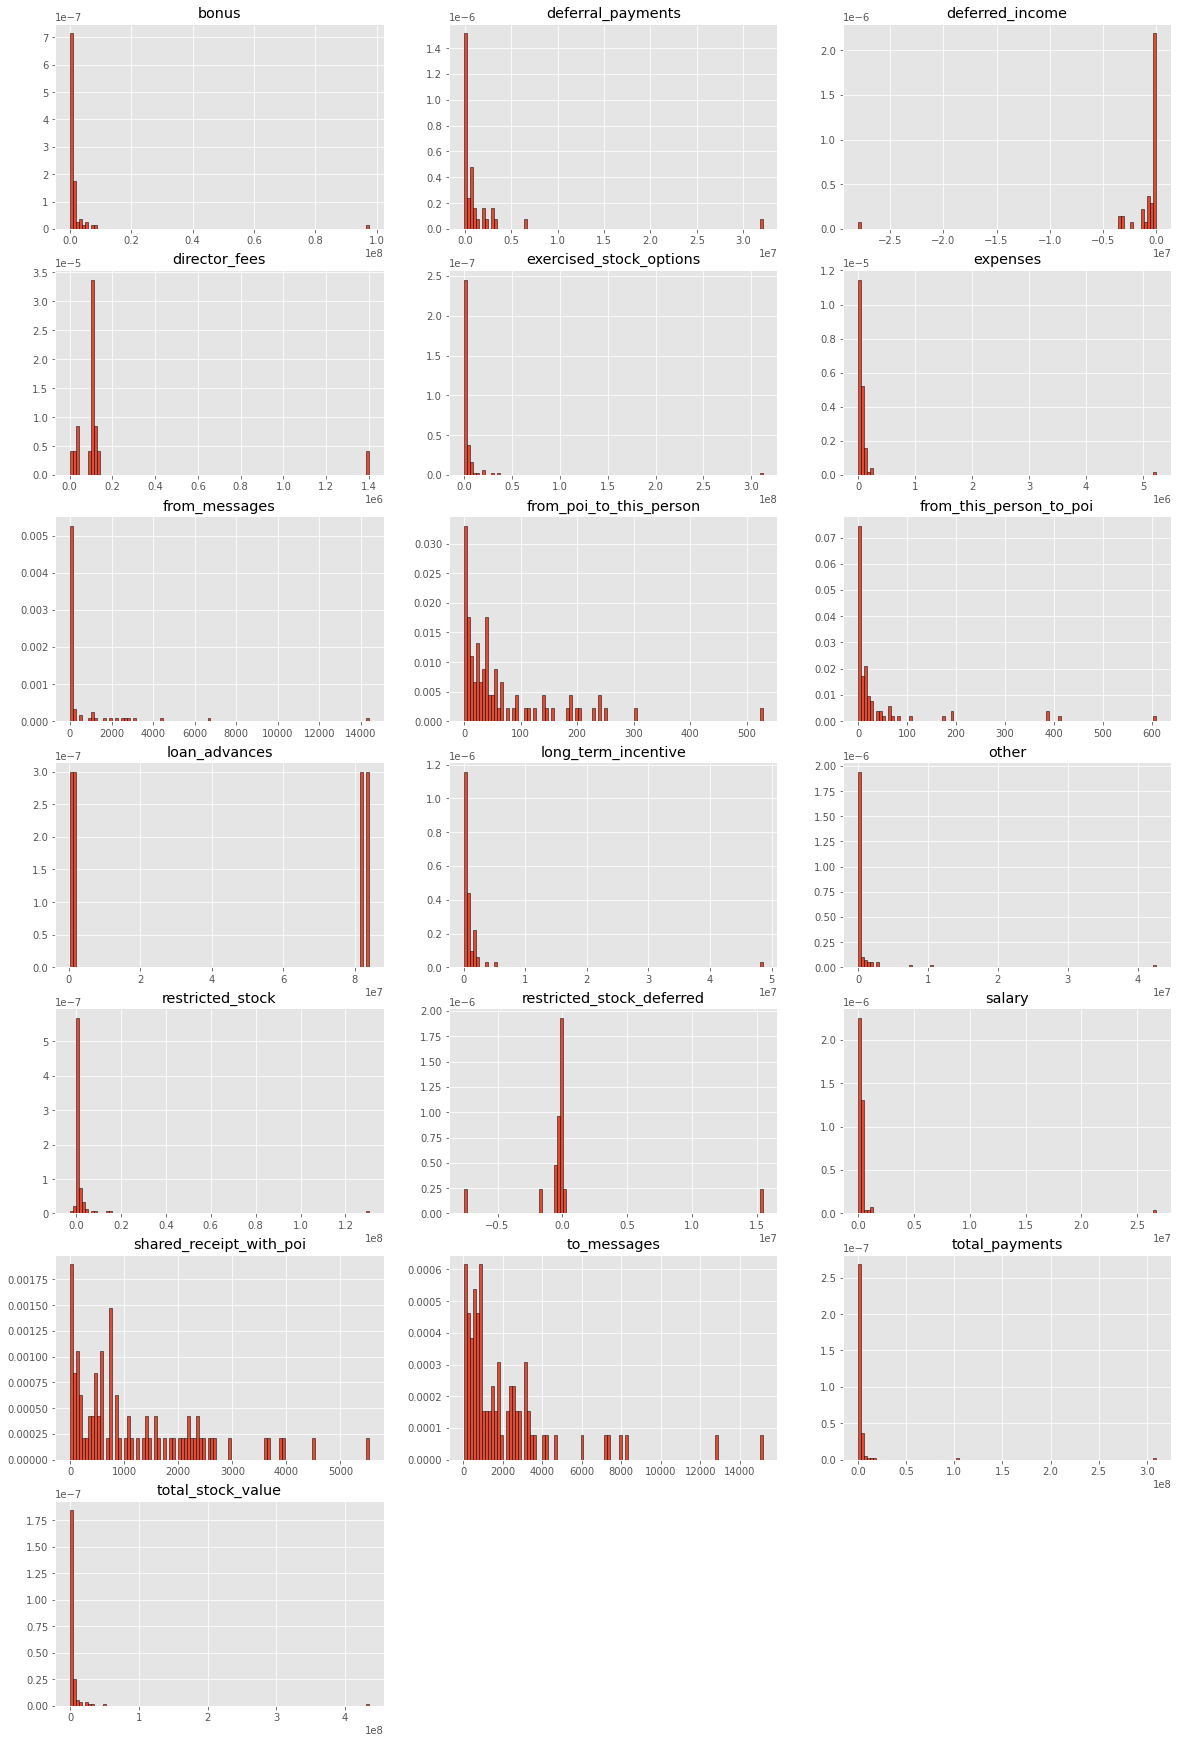

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,NaN,NaN,NaN,1465734.0,38559.0,40.0,23.0,8.0,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,1500000.0,NaN,NaN,NaN,1835558.0,NaN,92.0,28.0,23.0,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,NaN,504610.0,NaN,NaN,2218275.0,NaN,12.0,0.0,0.0,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
31,200000.0,204075.0,NaN,NaN,2549361.0,57727.0,NaN,NaN,NaN,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [5]:
#Target
train_Y = df_train["poi"].replace([True, False], [1, 0])

#emails與姓名與目標沒有相關，另外保存以作爲結果展示
emails = df_test["email_address"]
names = df_test["name"]

#捨棄訓練時不需要使用的欄位
df_train = df_train.drop(["email_address", "name", "poi"], axis = 1)
df_test = df_test.drop(["email_address", "name"], axis = 1)

#結合兩組數據以作特徵處理
df = pd.concat([df_train, df_test])

ShowHist(df)
df

In [6]:
#檢查DataFrame的空確值狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({"Missing Ratio" : data_na})
    display(missing_data)
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [7]:
from collections import defaultdict

#缺值用平均數填補
#df["salary"] = df["salary"].fillna(df["salary"].mean())

#缺值用中位數填補
fill_na_median = ["total_payments", "total_stock_value"]

#缺值填0
fill_na_0 = ["deferred_income", "deferral_payments", "exercised_stock_options", "restricted_stock",
            "shared_receipt_with_poi", "bonus", "expenses",
            "director_fees","long_term_incentive"]

#缺值用衆數填補
fill_na_mode = ["salary"]

#轉換為布林值
to_boolean = ["from_this_person_to_poi", "from_poi_to_this_person", "from_messages", "to_messages",
             "loan_advances","restricted_stock_deferred", "other"]

for col in df.columns:
    if col in fill_na_0:
        df[col] = df[col].fillna(0)
    elif col in fill_na_median:
        df[col] = df[col].fillna(df[col].median())
    elif col in fill_na_mode:
        mode_dict = defaultdict(lambda:0)

        for value in df[~df[col].isnull()][col]:
            mode_dict[value] += 1
    
        mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
        df[col] = df[col].fillna(mode_get[0][0])
    elif col in to_boolean:
        df[col] = df[col].fillna(0)
        df[col] = df[col].map(lambda x : 1 if x != 0 else 0)
    
na_check(df)

,Missing Ratio


In [8]:
#創建新欄位
df["has_bonus"] = df["bonus"].map(lambda x : 0 if x == 0 else 1)
df["has_deferral_payments"] = df["deferral_payments"].map(lambda x : 0 if x == 0 else 1)
df["has_director_fees"] = df["director_fees"].map(lambda x : 0 if x == 0 else 1)
df["high_expenses"] = df["expenses"].map(lambda x : 1 if x > 100000 else 0)
df["has_exercised_stock_options"] = df["exercised_stock_options"].map(lambda x : 0 if x == 0 else 1)
df["contact_with_poi"] = df["from_this_person_to_poi"] & df["from_poi_to_this_person"]
df["has_shared_receipt_with_poi"] = df["shared_receipt_with_poi"].map(lambda x : 1 if x != 0 else 0)

#清除Outlier
df["bonus"] = df["bonus"].map(lambda x : 2000000 if x > 2000000 else x)
df["deferral_payments"] = df["deferral_payments"].map(lambda x:1*1e7 if x > 1*1e7 else x)
df["deferral_payments"] = df["deferral_payments"].map(lambda x: x*-1 if x < 0 else x)
df["deferred_income"] = df["deferred_income"].map(lambda x : -1*1e7 if x < -1*1e7 else x)
df["director_fees"] = df["director_fees"].map(lambda x : 0.4*1e6 if x > 0.4*1e6 else x)
df["exercised_stock_options"] = df["exercised_stock_options"].map(lambda x: 1*1e8 if x > 1*1e8 else x)
df["expenses"] = df["expenses"].map(lambda x: 1*1e6 if x > 1*1e6 else x)
df["long_term_incentive"] = df["long_term_incentive"].map(lambda x : 1*1e7 if x > 1*1e7 else x)
df["restricted_stock"] = df["restricted_stock"].map(lambda x : 0.2*1e8 if x > 0.2*1e8 else x)
df["restricted_stock"] = df["restricted_stock"].map(lambda x : x*-1 if x < 0 else x)
df["salary"] = df["salary"].map(lambda x : 0.2*1e7 if x > 0.2*1e7 else x)

df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,to_messages,total_payments,total_stock_value,has_bonus,has_deferral_payments,has_director_fees,high_expenses,has_exercised_stock_options,contact_with_poi,has_shared_receipt_with_poi
0,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,1,1,1,0,...,1,505050.0,22542539.0,1,0,0,0,1,1,1
1,2000000.0,0.0,0.0,0.0,19250000.0,29336.0,1,1,1,0,...,1,8682716.0,26093672.0,1,0,0,0,1,1,1
2,200000.0,0.0,-4167.0,0.0,1624396.0,22884.0,1,1,1,0,...,1,2003885.0,2493616.0,1,0,0,0,1,1,1
3,800000.0,0.0,0.0,0.0,0.0,118134.0,0,0,0,0,...,0,2652612.0,985032.0,1,0,0,1,0,0,0
4,1250000.0,0.0,-262500.0,0.0,0.0,35818.0,1,1,1,0,...,1,1639297.0,126027.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,0.0,0.0,1465734.0,38559.0,1,1,1,0,...,1,2047593.0,1843816.0,1,0,0,0,1,1,1
29,1500000.0,0.0,0.0,0.0,1835558.0,0.0,1,1,1,0,...,1,4335388.0,3128982.0,1,0,0,0,1,1,1
30,0.0,504610.0,0.0,0.0,2218275.0,0.0,1,0,0,0,...,1,966522.0,2218275.0,0,1,0,0,1,0,1
31,200000.0,204075.0,0.0,0.0,2549361.0,57727.0,0,0,0,0,...,0,875889.0,3064208.0,1,1,0,0,1,0,0


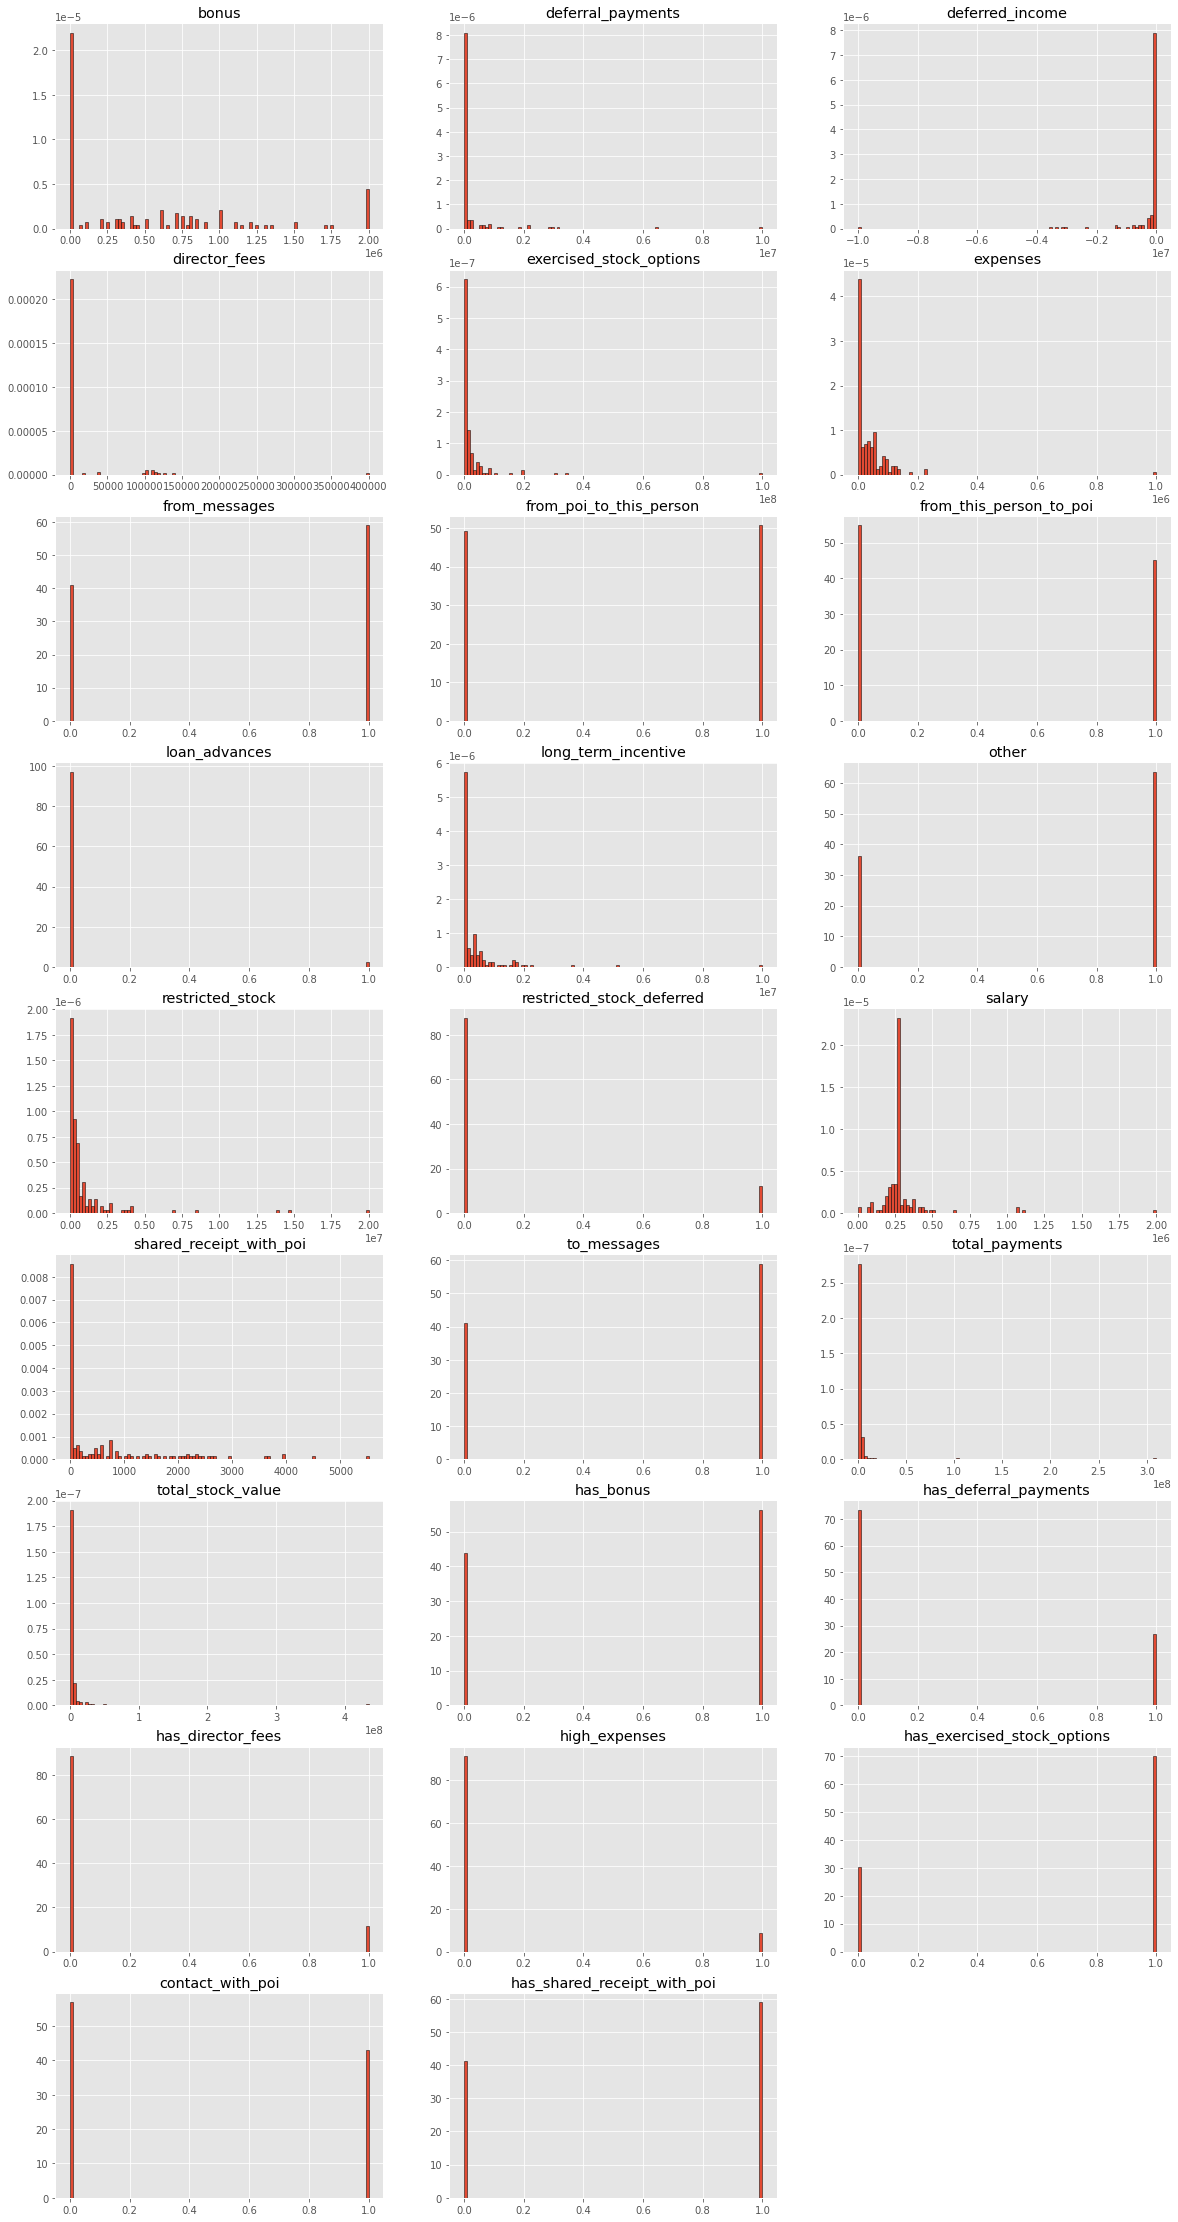

In [9]:
ShowHist(df)

In [10]:
#將資料最大最小化
df_col = df.columns

MMEncoder = MinMaxScaler()

#重新分割資料
train_num = train_Y.shape[0]
train_X = MMEncoder.fit_transform(df[:train_num])
test_X = df[train_num:]

ext_data = pd.concat([train_Y, pd.DataFrame(train_X)], axis = 1)
ext_data_corr = ext_data.corr()

df_col = df_col.insert(0, "poi")
ext_data_corr = ext_data_corr.set_axis(df_col, axis = 1, inplace = False)
ext_data_corr = ext_data_corr.set_axis(df_col, axis = 0, inplace = False)
ext_data_corr

,poi,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,to_messages,total_payments,total_stock_value,has_bonus,has_deferral_payments,has_director_fees,high_expenses,has_exercised_stock_options,contact_with_poi,has_shared_receipt_with_poi
poi,1.000000,0.322029,-0.089172,-0.222006,-0.117651,0.471984,0.254843,0.085404,0.141871,0.202178,...,0.085404,0.276116,0.452658,0.221602,0.050029,-0.130000,0.201253,-0.019612,0.209327,0.085404
bonus,0.322029,1.000000,0.149643,-0.426028,-0.258937,0.332675,0.329559,0.369920,0.433142,0.460881,...,0.369920,0.357562,0.363791,0.732665,0.031222,-0.286115,0.124913,0.166841,0.451390,0.369920
deferral_payments,-0.089172,0.149643,1.000000,-0.429125,-0.103317,-0.002215,-0.097423,0.149528,0.118074,0.137499,...,0.149528,0.054430,-0.022327,0.044965,0.552675,-0.108699,-0.081090,0.163974,0.143658,0.149528
deferred_income,-0.222006,-0.426028,-0.429125,1.000000,0.057843,-0.234471,-0.006452,-0.094418,-0.136808,-0.137263,...,-0.094418,-0.057976,-0.206958,-0.242015,-0.172018,0.069314,0.073341,-0.063436,-0.141335,-0.094418
director_fees,-0.117651,-0.258937,-0.103317,0.057843,1.000000,-0.126492,-0.096068,-0.369778,-0.323431,-0.275361,...,-0.369778,-0.076556,-0.111909,-0.353418,-0.185145,0.905011,0.055380,-0.315357,-0.270375,-0.369778
exercised_stock_options,0.471984,0.332675,-0.002215,-0.234471,-0.126492,1.000000,0.148274,0.020344,0.048756,0.072361,...,0.020344,0.603987,0.964204,0.088369,0.157729,-0.141102,-0.096057,0.257257,0.079562,0.020344
expenses,0.254843,0.329559,-0.097423,-0.006452,-0.096068,0.148274,1.000000,0.144761,0.230193,0.168484,...,0.144761,0.149106,0.175508,0.342111,-0.117254,-0.040192,0.773509,0.060028,0.171068,0.144761
from_messages,0.085404,0.369920,0.149528,-0.094418,-0.369778,0.020344,0.144761,1.000000,0.851766,0.725172,...,1.000000,0.125405,0.007255,0.391940,0.078532,-0.363465,0.054421,0.214855,0.712042,1.000000
from_poi_to_this_person,0.141871,0.433142,0.118074,-0.136808,-0.323431,0.048756,0.230193,0.851766,1.000000,0.815463,...,0.851766,0.145522,0.044831,0.453491,0.005079,-0.357378,0.100665,0.151578,0.835959,0.851766
from_this_person_to_poi,0.202178,0.460881,0.137499,-0.137263,-0.275361,0.072361,0.168484,0.725172,0.815463,1.000000,...,0.725172,0.152272,0.074355,0.454922,-0.026867,-0.304263,0.083335,0.171748,0.981894,0.725172


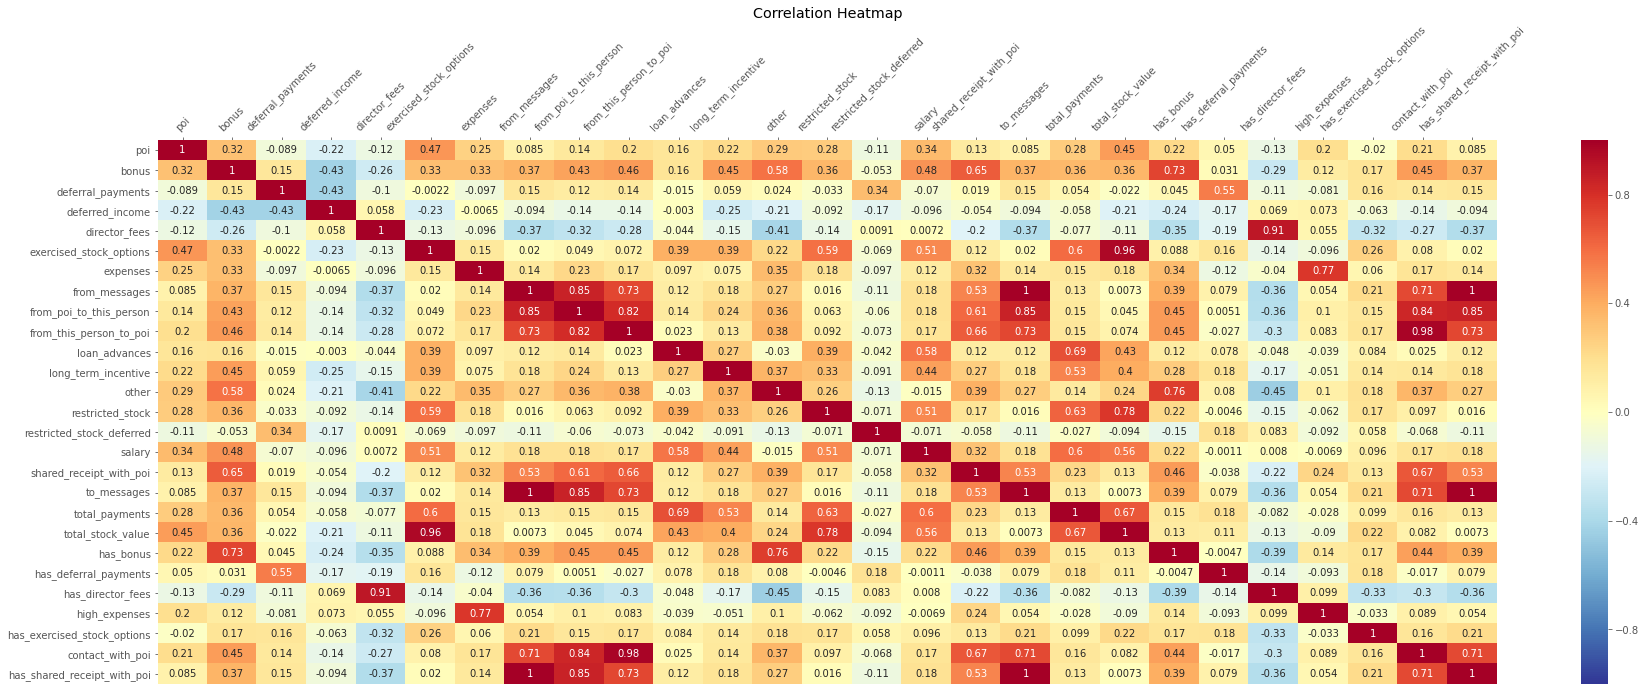

In [11]:
plt.figure(figsize = (30, 10))
heatmap = sns.heatmap(ext_data_corr, cmap = plt.cm.RdYlBu_r, vmin = -1.00, annot = True, vmax = 1.0)
heatmap.xaxis.tick_top()
plt.xticks(rotation = 45)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#檢查outlier
#five_num = [0, 25, 50, 75, 100]
#quantile_5s = [np.percentile(df[~df['bonus'].isnull()]['bonus'], q = i) for i in five_num]
#print(quantile_5s)

#df["bonus"].value_counts().sort_index(ascending = False)

# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestClassifier()
estimator.fit(train_X, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

expenses                       0.165695
exercised_stock_options        0.122073
salary                         0.119763
total_stock_value              0.116139
bonus                          0.103955
total_payments                 0.077700
shared_receipt_with_poi        0.075385
deferred_income                0.070768
restricted_stock               0.050955
long_term_incentive            0.019006
has_exercised_stock_options    0.015062
loan_advances                  0.014394
has_bonus                      0.010116
has_deferral_payments          0.007594
from_this_person_to_poi        0.006568
deferral_payments              0.005772
restricted_stock_deferred      0.005241
other                          0.003849
from_poi_to_this_person        0.002856
has_shared_receipt_with_poi    0.002660
to_messages                    0.001794
high_expenses                  0.001782
contact_with_poi               0.000874
has_director_fees              0.000000
director_fees                  0.000000


In [13]:
#捨棄低重要性資料
high_feature = list(feats[feats > 0].index)
low_feature = list(feats[feats <= 0].index)
train_X = MMEncoder.fit_transform(df[:train_num][high_feature])
test_X = test_X.drop(low_feature, axis = 1)
print("high_feature: ", high_feature, "\n\nlow_feature: ", low_feature)

high_feature:  ['expenses', 'exercised_stock_options', 'salary', 'total_stock_value', 'bonus', 'total_payments', 'shared_receipt_with_poi', 'deferred_income', 'restricted_stock', 'long_term_incentive', 'has_exercised_stock_options', 'loan_advances', 'has_bonus', 'has_deferral_payments', 'from_this_person_to_poi', 'deferral_payments', 'restricted_stock_deferred', 'other', 'from_poi_to_this_person', 'has_shared_receipt_with_poi', 'to_messages', 'high_expenses', 'contact_with_poi'] 

low_feature:  ['has_director_fees', 'director_fees', 'from_messages']


In [14]:
#訓練模型
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)

gdbt = GradientBoostingClassifier()

rf = RandomForestClassifier(
    min_samples_split=2, 
    min_samples_leaf=1,
)

n_estimators = [100 * (i + 1) for i in range(5)]
max_depth = [2 * (i + 1) for i in range(5)]
print("Searching n_estimators:", n_estimators)
print("Searching max_depth:", max_depth)

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)

grid_search = GridSearchCV(gdbt, param_grid, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gdbt_result = grid_search.fit(train_X, train_Y)                       
print(f"Best Accuracy: {gdbt_result.best_score_} using {gdbt_result.best_params_}")

grid_search = GridSearchCV(rf, param_grid, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
rf_result = grid_search.fit(train_X, train_Y)                       
print(f"Best Accuracy: {rf_result.best_score_} using {rf_result.best_params_}")

gdbt = GradientBoostingClassifier(
    n_estimators = gdbt_result.best_params_["n_estimators"],
    max_depth = gdbt_result.best_params_["max_depth"],
    learning_rate = gdbt_result.best_params_["n_estimators"] / 100
)

rf = RandomForestClassifier(
    n_estimators = rf_result.best_params_["n_estimators"],
    max_depth = rf_result.best_params_["max_depth"],
    min_samples_split=2, 
    min_samples_leaf=1,
)

Searching n_estimators: [100, 200, 300, 400, 500]
Searching max_depth: [2, 4, 6, 8, 10]
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Accuracy: -0.07964601769911504 using {'max_depth': 2, 'n_estimators': 200}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.0s remaining:    0.7s


Best Accuracy: -0.09734513274336283 using {'max_depth': 4, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.7s finished


In [15]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': lr_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x > 0.5 else 0) 
sub.to_csv('Enron_lr.csv', index=False) 

In [16]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict(test_X)
sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x > 0.5 else 0) 
sub.to_csv('Enron_gdbt.csv', index=False)

In [17]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict(test_X)
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x > 0.5 else 0) 
sub.to_csv('Enron_rf.csv', index=False)

In [18]:
import mlxtend
from mlxtend.classifier import StackingClassifier

meta_estimator = GradientBoostingClassifier(
    n_estimators = gdbt_result.best_params_["n_estimators"],
    max_depth = gdbt_result.best_params_["max_depth"],
)

stacking = StackingClassifier(
        classifiers = [lr, gdbt, rf], 
        use_probas = True,
        average_probas=False,
        meta_classifier = meta_estimator
)

In [19]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict(test_X)
sub = pd.DataFrame({'name': names, 'poi': stacking_pred})
sub.to_csv('Enron_stacking.csv', index=False)